In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import pickle

In [ ]:
# /mnt/e/flux_ET_dataset/terra_climate/edited_monthly/monthly_dataset_3sep.parquet
monthly_dataset = pd.read_parquet("C:\Users\acer\Desktop\final_code\data\monthly_dataset_3sep.parquet", engine='pyarrow')
# budyko_train = pd.read_excel("e:/Term2/WERI/ML_Budyko/3- result/train_test_result_Budyko_11Nov.xlsx", sheet_name = "train")
# budyko_test = pd.read_excel("e:/Term2/WERI/ML_Budyko/3- result/train_test_result_Budyko_11Nov.xlsx", sheet_name = "test")

# budyko_test = pd.read_excel("/mnt/c/Users/acer/Desktop/result/budyko.xlsx", sheet_name = "test")
budyko_4model = pd.read_csv("C:\Users\acer\Desktop\final_code\export\budyko\result_4models_estimation.csv")
# /mnt/e/Term2/WERI/ML_Budyko/3- result/Budyko_curve/4Models_budyko/result_4models_estimation.csv


In [3]:
monthly_dataset = monthly_dataset.drop(["evaporation_from_bare_soil_max",
                                        "evaporation_from_bare_soil_min",
                                        "evaporation_from_bare_soil_sum",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_max",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_min",
                                        "evaporation_from_open_water_surfaces_excluding_oceans_sum",
                                        "evaporation_from_the_top_of_canopy_max",
                                        "evaporation_from_the_top_of_canopy_min",
                                        "evaporation_from_the_top_of_canopy_sum",
                                        "evaporation_from_vegetation_transpiration_max",
                                        "evaporation_from_vegetation_transpiration_min",
                                        "evaporation_from_vegetation_transpiration_sum",
                                        "forecast_albedo_min",
                                        "lake_bottom_temperature",
                                        "lake_bottom_temperature_max",
                                        "lake_bottom_temperature_min",
                                        "lake_ice_depth",
                                        "lake_ice_depth_max",
                                        "lake_ice_depth_min",
                                        "lake_ice_temperature",
                                        "lake_ice_temperature_max",
                                        "lake_ice_temperature_min",
                                        "lake_mix_layer_depth",
                                        "lake_mix_layer_depth_max",
                                        "lake_mix_layer_depth_min",
                                        "lake_mix_layer_temperature",
                                        "lake_mix_layer_temperature_max",
                                        "lake_mix_layer_temperature_min",
                                        "lake_shape_factor",
                                        "lake_shape_factor_max",
                                        "lake_shape_factor_min",
                                        "lake_total_layer_temperature",
                                        "lake_total_layer_temperature_max",
                                        "lake_total_layer_temperature_min",
                                        "potential_evaporation_max",
                                        "potential_evaporation_min",
                                        "potential_evaporation_sum",
                                        "runoff_max",
                                        "runoff_min",
                                        "runoff_sum",
                                        "skin_reservoir_content",
                                        "skin_reservoir_content_max",
                                        "skin_reservoir_content_min",
                                        "skin_temperature",
                                        "skin_temperature_max",
                                        "skin_temperature_min",
                                        "snow_albedo",
                                        "snow_albedo_max",
                                        "snow_albedo_min",
                                        "snow_cover",
                                        "snow_cover_max",
                                        "snow_cover_min",
                                        "snow_density",
                                        "snow_density_max",
                                        "snow_density_min",
                                        "snow_depth",
                                        "snow_depth_max",
                                        "snow_depth_min",
                                        "snow_depth_water_equivalent",
                                        "snow_depth_water_equivalent_max",
                                        "snow_depth_water_equivalent_min",
                                        "snow_evaporation_max",
                                        "snow_evaporation_min",
                                        "snow_evaporation_sum",
                                        "snowfall_max",
                                        "snowfall_min",
                                        "snowfall_sum",
                                        "snowmelt_max",
                                        "snowmelt_min",
                                        "snowmelt_sum",
                                        "sub_surface_runoff_max",
                                        "sub_surface_runoff_min",
                                        "sub_surface_runoff_sum",
                                        "surface_latent_heat_flux_max",
                                        "surface_latent_heat_flux_min",
                                        "surface_latent_heat_flux_sum",
                                        "surface_net_solar_radiation_min",
                                        "surface_net_thermal_radiation_max",
                                        "surface_net_thermal_radiation_min",
                                        "surface_net_thermal_radiation_sum",
                                        "surface_runoff_max",
                                        "surface_runoff_min",
                                        "surface_runoff_sum",
                                        "surface_sensible_heat_flux_min",
                                        "surface_sensible_heat_flux_sum",
                                        "surface_solar_radiation_downwards_min",
                                        "surface_solar_radiation_downwards_sum",
                                        "surface_thermal_radiation_downwards_sum",
                                        "temperature_of_snow_layer",
                                        "temperature_of_snow_layer_max",
                                        "temperature_of_snow_layer_min",
                                        "total_evaporation_max",
                                        "total_evaporation_min",
                                        "total_evaporation_sum",
                                        "total_precipitation_min",
                                        "total_precipitation_sum",
                                        "u_component_of_wind_10m",
                                        "u_component_of_wind_10m_min",
                                        "v_component_of_wind_10m",
                                        "v_component_of_wind_10m_min",
                                        "leaf_area_index_low_vegetation_max",
                                        "leaf_area_index_low_vegetation_min",
                                        "leaf_area_index_high_vegetation_max",
                                        "leaf_area_index_high_vegetation_min",
                                        "forecast_albedo_max",
                                        "soil_temperature_level_1_max",
                                        "soil_temperature_level_1_min",
                                        "soil_temperature_level_2_max",
                                        "soil_temperature_level_2_min",
                                        "soil_temperature_level_3_max",
                                        "soil_temperature_level_3_min",
                                        "soil_temperature_level_4_min",
                                        "soil_temperature_level_4_max",
                                        "volumetric_soil_water_layer_1_max",
                                        "volumetric_soil_water_layer_1_min",
                                        "volumetric_soil_water_layer_2_max",
                                        "volumetric_soil_water_layer_2_min",
                                        "volumetric_soil_water_layer_3_max",
                                        "volumetric_soil_water_layer_3_min",
                                        "volumetric_soil_water_layer_4_max",
                                        "volumetric_soil_water_layer_4_min",
                                        "swe"], axis = 1)

X = monthly_dataset.drop(['ET_fill',
                          'Site_ID',
                          'General_classification',
                          'Land_cover_details',
                          'Land_cover_type',
                          'eto_hargreaves',
                          'time',
                          'date',
                          'aet',
                          'pet',
                          'delta_s',
                          'def'], axis =1)

y = monthly_dataset['ET_fill']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [4]:
def calculate_metrics(actual, predicted):

    actual = actual
    predicted = predicted

    rmse = np.sqrt(mean_squared_error(actual, predicted))

    nse = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

    nrmse = rmse / (np.max(actual) - np.min(actual))

    r = stats.pearsonr(predicted,actual)[0]
    r2= r**2

    mean_value = sum(predicted) / len(predicted)
    var_value = sum(pow(x-mean_value,2) for x in predicted) / len(predicted)  # variance
    std  = math.sqrt(var_value)  # standard deviation

    mbe = np.mean(predicted - actual)  # Mean Bias Error

    return rmse, nse, nrmse, r2, r, std, mbe

In [33]:
best_model_xgb = XGBRegressor(
    n_estimators= 100,
    max_depth= 3,
    learning_rate= 0.1,
    gamma= 0.2,
    subsample= 1.0,
    colsample_bytree= 1.0)


selector_xgb = RFE(estimator=best_model_xgb, n_features_to_select = 7)
selector_xgb.fit(X_train, y_train)

selected_features_xgb = X.columns[selector_xgb.support_]

y_train_pred_xgb = selector_xgb.predict(X_train)
y_test_pred_xgb = selector_xgb.predict(X_test)

In [34]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred_xgb)
print("xgboost Regressor :")
print(f"RMSE train : {rmse_train}\n",
      f"NSE train : {nse_train}\n",
      f"NRMSE train : {nrmse_train}\n",
      f"R2 train : {r2_train}\n",
      f"R train : {r_train}\n",
      f"std train : {std_train}\n",
      f"MBE train : {mbe_train}")
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred_xgb)
print("----------------------------------------")

print(f"RMSE test : {rmse_test}\n",
      f"NSE test : {nse_test}\n",
      f"NRMSE test : {nrmse_test}\n",
      f"R2 test : {r2_test}\n",
      f"R test : {r_test}\n",
      f"std test : {std_test}\n",
      f"MBE test : {mbe_test}")


xgboost Regressor :
RMSE train : 2.2713267154391725
 NSE train : 0.9431533510651555
 NRMSE train : 0.040884299250625235
 R2 train : 0.9498042239275415
 R train : 0.9745789983000565
 std train : 8.507322411131106
 MBE train : -0.006734226944817046
----------------------------------------
RMSE test : 4.828854824094747
 NSE test : 0.7274159640073419
 NRMSE test : 0.11536948207047457
 R2 test : 0.730223528433315
 R test : 0.8545311746409928
 std test : 8.35839381654052
 MBE test : 0.18243060553223686


In [30]:
best_model_rf = RandomForestRegressor(
    max_depth= None,
    max_leaf_nodes= 20,
    min_samples_split= 5,
    n_estimators= 50,
    random_state= None)

# best_model_rf = RandomForestRegressor(
#     max_depth= None,
#     max_leaf_nodes= None,
#     min_samples_split= 3,
#     n_estimators= 100,
#     random_state= 22)



selector_rf = RFE(estimator=best_model_rf, n_features_to_select = 3)
selector_rf.fit(X_train, y_train)

selected_features_rf = X.columns[selector_rf.support_]

y_train_pred_rf = selector_rf.predict(X_train)
y_test_pred_rf = selector_rf.predict(X_test)

In [31]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred_rf)
print("RandombForest Regressor :")
print(f"RMSE train : {rmse_train}\n",
      f"NSE train : {nse_train}\n",
      f"NRMSE train : {nrmse_train}\n",
      f"R2 train : {r2_train}\n",
      f"R train : {r_train}\n",
      f"std train : {std_train}\n",
      f"MBE train : {mbe_train}")
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred_rf)
print("----------------------------------------")

print(f"RMSE test : {rmse_test}\n",
      f"NSE test : {nse_test}\n",
      f"NRMSE test : {nrmse_test}\n",
      f"R2 test : {r2_test}\n",
      f"R test : {r_test}\n",
      f"std test : {std_test}\n",
      f"MBE test : {mbe_test}")


RandombForest Regressor :
RMSE train : 3.9861938359700715
 NSE train : 0.8249095428257875
 NRMSE train : 0.07175222329443104
 R2 train : 0.8404613431764177
 R train : 0.9167667877799772
 std train : 7.545921871277115
 MBE train : 0.03343587958164226
----------------------------------------
RMSE test : 5.232567840726773
 NSE test : 0.679932295374067
 NRMSE test : 0.1250148666037893
 R2 test : 0.6839719293911536
 R test : 0.8270259544845939
 std test : 8.089854460367574
 MBE test : 0.3890284997255921


In [36]:
best_model_GB = GradientBoostingRegressor(
    # learning_rate= 0.1,
    # max_depth= 6,
    # n_estimators= 200,
    # subsample= 0.75
)


selector_GB = RFE(estimator=best_model_GB, n_features_to_select = 5)
selector_GB.fit(X_train, y_train)

selected_features_GB = X.columns[selector_GB.support_]

y_train_pred_GB = selector_GB.predict(X_train)
y_test_pred_GB = selector_GB.predict(X_test)

In [37]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred_GB)
print("Gradient Boosting Regressor :")
print(f"RMSE train : {rmse_train}\n",
      f"NSE train : {nse_train}\n",
      f"NRMSE train : {nrmse_train}\n",
      f"R2 train : {r2_train}\n",
      f"R train : {r_train}\n",
      f"std train : {std_train}\n",
      f"MBE train : {mbe_train}")
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred_GB)
print("----------------------------------------")

print(f"RMSE test : {rmse_test}\n",
      f"NSE test : {nse_test}\n",
      f"NRMSE test : {nrmse_test}\n",
      f"R2 test : {r2_test}\n",
      f"R test : {r_test}\n",
      f"std test : {std_test}\n",
      f"MBE test : {mbe_test}")

Gradient Boosting Regressor :
RMSE train : 2.3168104400327287
 NSE train : 0.9408538264468784
 NRMSE train : 0.04170301467129796
 R2 train : 0.9474418186378687
 R train : 0.9733662304794988
 std train : 8.499419954890145
 MBE train : 1.5582077538598687e-17
----------------------------------------
RMSE test : 5.243978820191711
 NSE test : 0.6785347909374442
 NRMSE test : 0.12528749413945633
 R2 test : 0.6831900825208295
 R test : 0.8265531335134054
 std test : 8.2748906457218
 MBE test : 0.03442671368839072


In [ ]:

y_train_GB = pd.DataFrame({
    'y_train_pred_GB': y_train_pred_GB,
    'y_train': y_train
})

y_test_GB = pd.DataFrame({
    'y_test_pred_GB': y_test_pred_GB,
    'y_test': y_test
})

y_test_GB

In [ ]:
y_train_GB.to_csv("/mnt/c/Users/acer/Desktop/result/y_train_GB.csv")
y_test_GB.to_csv("/mnt/c/Users/acer/Desktop/result/y_test_GB.csv")

In [46]:
best_model_Ada = AdaBoostRegressor(
    learning_rate = 0.25,
    loss = 'linear',
    n_estimators = 50)

selector_Ada = RFE(estimator=best_model_Ada, n_features_to_select = 6)
selector_Ada.fit(X_train, y_train)

selected_features_Ada = X.columns[selector_Ada.support_]

y_train_pred_Ada = selector_Ada.predict(X_train)
y_test_pred_Ada = selector_Ada.predict(X_test)

In [47]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred_Ada)
print("Ada Boost Regressor :")
print(f"RMSE train : {rmse_train}\n",
      f"NSE train : {nse_train}\n",
      f"NRMSE train : {nrmse_train}\n",
      f"R2 train : {r2_train}\n",
      f"R train : {r_train}\n",
      f"std train : {std_train}\n",
      f"MBE train : {mbe_train}")
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred_Ada)
print("----------------------------------------")

print(f"RMSE test : {rmse_test}\n",
      f"NSE test : {nse_test}\n",
      f"NRMSE test : {nrmse_test}\n",
      f"R2 test : {r2_test}\n",
      f"R test : {r_test}\n",
      f"std test : {std_test}\n",
      f"MBE test : {mbe_test}")

Ada Boost Regressor :
RMSE train : 4.7954300319810965
 NSE train : 0.7466034090980556
 NRMSE train : 0.08631862388191992
 R2 train : 0.7909565172648668
 R train : 0.8893573619557364
 std train : 6.622260658512915
 MBE train : 0.7760895869145155
----------------------------------------
RMSE test : 5.758671752307138
 NSE test : 0.6123348434445041
 NRMSE test : 0.13758437593991973
 R2 test : 0.6292445495056632
 R test : 0.7932493614908639
 std test : 6.453270054910333
 MBE test : 0.8160778050793173


In [ ]:
best_model_ExtraTrees = ExtraTreesRegressor(
    bootstrap = True,
    max_depth = 10,
    max_features = 0.5,
    min_impurity_decrease = 0.1,
    min_samples_split = 5,
    n_estimators = 50)

selector_ExtraTrees = RFE(estimator=best_model_ExtraTrees, n_features_to_select = 10)
selector_ExtraTrees.fit(X_train, y_train)

selected_features_ExtraTrees = X.columns[selector_ExtraTrees.support_]

y_train_pred_ExtraTrees = selector_ExtraTrees.predict(X_train)
y_test_pred_ExtraTrees = selector_ExtraTrees.predict(X_test)

In [ ]:
rmse_train, nse_train, nrmse_train, r2_train, r_train, std_train, mbe_train = calculate_metrics(actual=y_train, predicted=y_train_pred_ExtraTrees)
print("Extra Trees Regressor :")
print(f"RMSE train : {rmse_train}\n",
      f"NSE train : {nse_train}\n",
      f"NRMSE train : {nrmse_train}\n",
      f"R2 train : {r2_train}\n",
      f"R train : {r_train}\n",
      f"std train : {std_train}\n",
      f"MBE train : {mbe_train}")
rmse_test, nse_test, nrmse_test, r2_test, r_test, std_test, mbe_test = calculate_metrics(actual=y_test, predicted=y_test_pred_ExtraTrees)
print("----------------------------------------")

print(f"RMSE test : {rmse_test}\n",
      f"NSE test : {nse_test}\n",
      f"NRMSE test : {nrmse_test}\n",
      f"R2 test : {r2_test}\n",
      f"R test : {r_test}\n",
      f"std test : {std_test}\n",
      f"MBE test : {mbe_test}")

In [51]:
budyko_4model

,Unnamed: 0,Year,Month,ET_fill,ppt,eto_hargreaves,aet,def,pr,pet,...,delta,pr_delta,ratio_budyko_hargreaves_Fu,aet_budyko_Fu,ratio_budyko_hargreaves_Turc-pike,aet_budyko_Turc-pike,ratio_budyko_hargreaves_Zhang,aet_budyko_Zhang,ratio_budyko_hargreaves_wang-Tang,aet_budyko_wang-Tang
0,0,2009,4,8.290689,22.100,7.429282,19.00,110.30,11.0,131.6,...,-5.5,27.600,0.245079,6.764175,0.245016,6.762429,0.229248,6.327255,0.245103,6.764857
1,1,2009,5,6.472561,17.600,11.523211,12.40,168.65,10.0,186.9,...,-3.5,21.100,0.435976,9.199096,0.430879,9.091537,0.398475,8.407825,0.440929,9.303597
2,2,2009,6,5.417223,9.500,3.296496,7.30,190.80,5.0,201.1,...,-2.6,12.100,0.247696,2.997126,0.247598,2.995935,0.231588,2.802209,0.247754,2.997825
3,4,2009,9,8.310515,1.600,5.217145,4.20,155.10,2.0,159.7,...,-1.2,2.800,0.802100,2.245879,0.792971,2.220318,0.762879,2.136061,0.810952,2.270667
4,5,2009,10,9.522431,4.300,12.645993,37.15,56.30,38.0,95.2,...,-1.0,5.300,0.849876,4.504340,0.844021,4.473313,0.821632,4.354647,0.855395,4.533591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,108,2020,3,17.210329,51.816,20.320406,51.70,34.20,41.0,86.1,...,-5.9,57.716,0.308840,17.825036,0.307623,17.754764,0.285928,16.502625,0.309959,17.889578
98,109,2020,4,8.070300,38.800,11.013723,47.80,90.60,35.0,134.7,...,-8.9,47.700,0.213681,10.192604,0.213959,10.205830,0.201079,9.591451,0.213385,10.178483
99,110,2020,5,3.088043,4.100,5.001569,12.00,182.00,7.0,194.0,...,-4.9,9.000,0.441505,3.973547,0.436207,3.925861,0.403404,3.630635,0.446663,4.019964
100,114,2020,11,1.573960,12.319,4.425902,12.00,43.20,12.0,55.4,...,-1.2,13.519,0.290454,3.926652,0.289632,3.915541,0.269638,3.645236,0.291196,3.936672


In [62]:
# y_train_budyko = budyko_train["observed"]
# y_train_pred_budyko = budyko_train["simulated"]

y_test_budyko = budyko_4model["ET_fill"]
y_test_pred_budyko = budyko_4model["aet_budyko_wang-Tang"]

In [63]:
def calculate_metrics_for_budyko(df,name_col):
    df = df.dropna()
    actual = df['ET_fill']
    predicted = df[name_col]

    rmse = np.sqrt(mean_squared_error(actual, predicted))

    nse = 1 - (np.sum((actual - predicted) ** 2) / np.sum((actual - np.mean(actual)) ** 2))

    nrmse = rmse / (np.max(actual) - np.min(actual))

    r = stats.pearsonr(predicted,actual)[0]
    r2= r**2

    mean_value = sum(predicted) / len(predicted)
    var_value = sum(pow(x-mean_value,2) for x in predicted) / len(predicted)  # variance
    std  = math.sqrt(var_value)  # standard deviation

    return rmse, nse, nrmse, r2, r, std

rmse, nse, nrmse, r2, r, std = calculate_metrics_for_budyko(budyko_4model, "aet_budyko_wang-Tang")
print("----------------------------------------")

print(f"RMSE: {rmse}\n",
      f"NSE: {nse}\n",
      f"NRMSE: {nrmse}\n",
      f"R2: {r2}\n",
      f"R: {r}\n",
      f"std: {std}\n")

----------------------------------------
RMSE: 3.496257687339979
 NSE: 0.7512481912527639
 NRMSE: 0.11040890613731766
 R2: 0.7686919628334924
 R: 0.8767507985930166
 std: 7.053412635618545



In [ ]:
y_train_XGB = pd.DataFrame({
    'y_train_pred_xgb': y_train_pred_xgb,
    'y_train': y_train
})

y_test_XGB = pd.DataFrame({
    'y_test_pred_xgb': y_test_pred_xgb,
    'y_test': y_test
})



y_train_XGB.to_csv("/mnt/c/Users/acer/Desktop/result/y_train_XGB.csv")
y_test_XGB.to_csv("/mnt/c/Users/acer/Desktop/result/y_test_XGB.csv")

In [ ]:
# y_train_pred_Ada
# y_test_pred_Ada


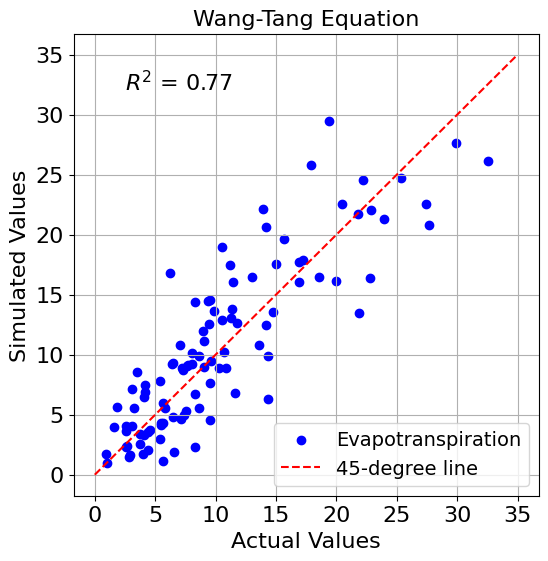

In [64]:
actual = y_test_budyko
simulated = y_test_pred_budyko

# Calculate R2
r2 = r2

# Plot the actual vs. simulated values
plt.figure(figsize=(6, 6))
plt.scatter(actual, simulated, color='blue', label='Evapotranspiration')

# Plot the 45-degree line
min_val = min(min(actual), min(simulated))
max_val = max(max(actual), max(simulated))
plt.plot([0, 35], [0, 35], 'r--', label='45-degree line')

# Labels and Title
plt.xlabel('Actual Values', fontsize=16)
plt.ylabel('Simulated Values', fontsize=16)
plt.title('Wang-Tang Equation', fontsize=16)

# Add R2 value as text on the plot
plt.text(2.5, 32, f'$R^2$ = {r2:.2f}', fontsize=16, color='black')
# 5,55

# Set custom font for tick labels
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.grid()
plt.legend(fontsize=14, loc = 'lower right')
plt.savefig('/mnt/e/Term2/WERI/ML_Budyko/3- result/chart/45degree_3Mar/Wang_Tang_27Apr.png', dpi=300, bbox_inches='tight')


# Show the plot
plt.show()